In [ ]:
!git clone https://github.com/priya-ya-creator/TreeSpeciesClassification.git

Cloning into 'git'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 9 (from 2)
Receiving objects: 100% (12/12), 72.52 MiB | 36.31 MiB/s, done.


In [14]:
from google.colab import files
uploaded = files.upload()


Saving Tree_classification_dataset.zip to Tree_classification_dataset.zip


In [15]:
import zipfile
import os

# Extract uploaded file
with zipfile.ZipFile("Tree_classification_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("tree_dataset")  # creates folder named 'tree_dataset'

print("Extraction done.")


Extraction done.


In [21]:
import os
repo_path = "tree_dataset/content/Tree_Species_Dataset/Tree_Species_Dataset"
print("Contents:", os.listdir(repo_path))


Contents: ['champa', 'bili', 'pipal', 'kesudo', 'shirish', 'bamboo', 'other', 'motichanoti', 'khajur', 'gunda', 'cactus', 'mango', 'gulmohor', 'jamun', 'banyan', 'saptaparni', 'neem', 'sonmahor', 'babul', 'pilikaren', 'asopalav', 'vad', 'nilgiri', 'kanchan', 'sitafal', 'sugarcane', 'simlo', 'garmalo', 'amla', 'coconut', '.git']


In [22]:
class_dirs = os.listdir(repo_path)
print(f'Number of classes: {len(class_dirs)}')

Number of classes: 31


In [25]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
  class_folder = os.path.join(repo_path, class_name)
  if os.path.isdir(class_folder):
    for img_file in os.listdir(class_folder):
      img_path = os.path.join(class_folder, img_file)
      image_paths.append(img_path)
      labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1605


In [26]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
print(class_counts_df.sort_values(by='Count', ascending=False).head())
print("shape:", class_counts_df.shape)

    Class  Count
6   other    150
1    bili     50
0  champa     50
2   pipal     50
3  kesudo     50
shape: (31, 2)


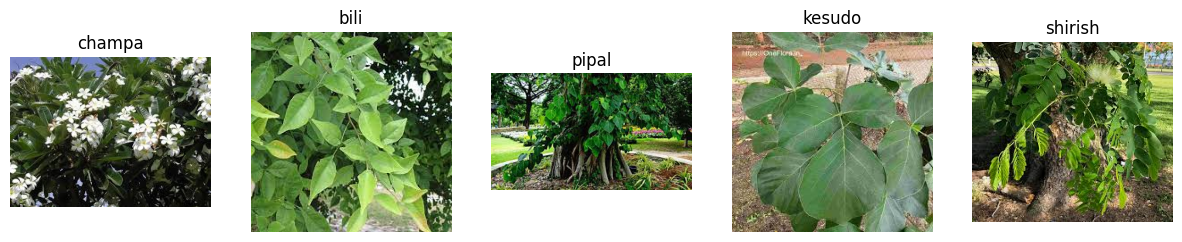

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
  plt.figure(figsize=(15, 10))
  for i, class_name in enumerate(class_dirs[:n]):
    img_path = os.path.join(repo_path, class_name, os.listdir(os.path.join(repo_path, class_name))[0])
    img = Image.open(img_path)
    plt.subplot(1, n, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')
  plt.show()

show_sample_images(repo_path, class_dirs, n=5)

In [33]:
from PIL import Image
import os

repo_path = "tree_dataset/content/Tree_Species_Dataset/Tree_Species_Dataset"
image_shapes = []

# Valid image extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

for class_dir in os.listdir(repo_path):
    class_path = os.path.join(repo_path, class_dir)

    if not os.path.isdir(class_path):
        continue  # skip files, only go into folders

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        # Skip if not a valid image file
        if not any(img_file.lower().endswith(ext) for ext in valid_extensions):
            continue

        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except Exception as e:
            print(f"Skipping {img_path}: {e}")

import pandas as pd
shapes_df = pd.DataFrame(image_shapes, columns=['Height', 'Width'])
print(shapes_df.head())


   Height  Width
0     260    194
1     194    259
2     275    183
3     225    225
4     225    225


In [34]:
print(shapes_df.describe())

            Height        Width
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [38]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        if os.path.isdir(img_path):
            continue
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [39]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            with Image.open(img_path) as img:
                img.verify()
        except (IOError, SyntaxError) as e:
            corrupt_images.append(img_path)
print("Corrupted images:", len(corrupt_images))

Corrupted images: 5


Duplicate set 1:


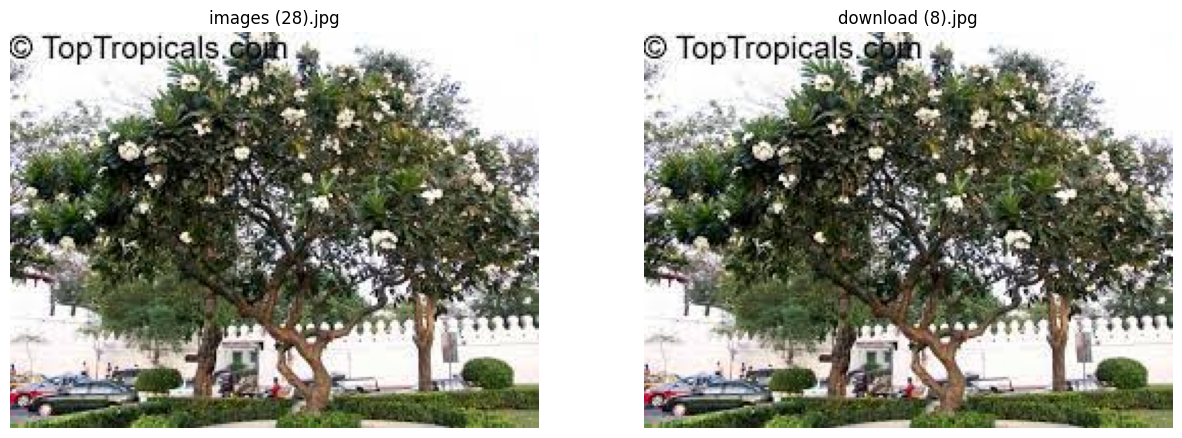

Duplicate set 2:


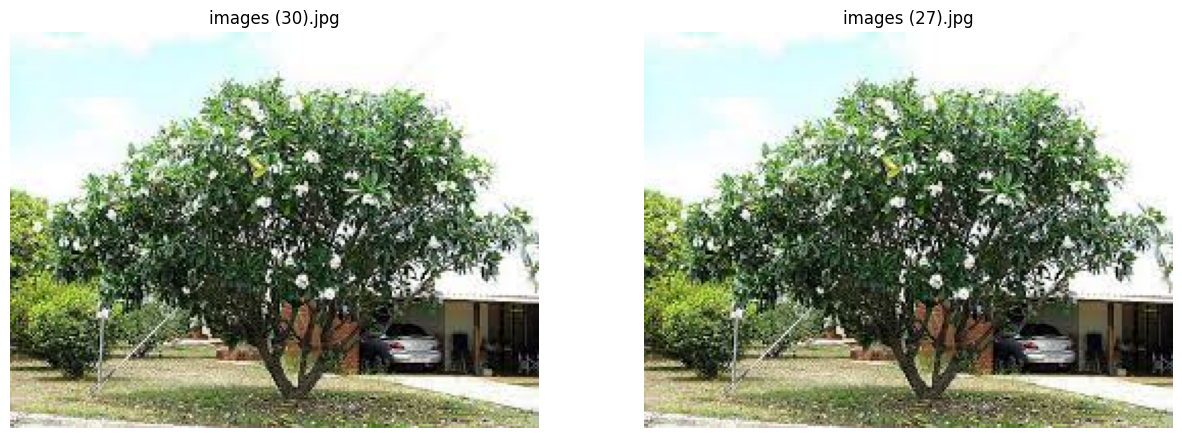

Duplicate set 3:


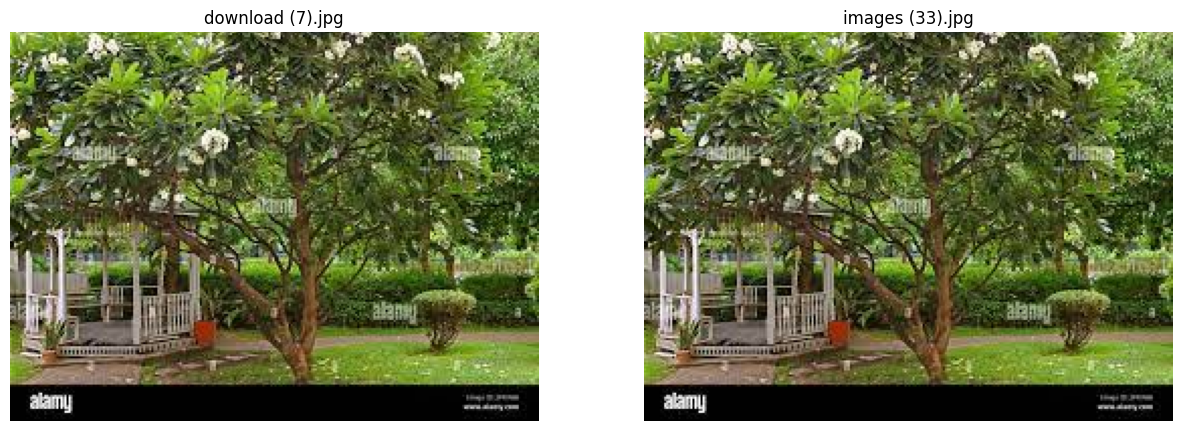

In [40]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display = 3):
  shown = 0
  for hash_val, dup_paths in duplicates.items():
    if shown >= sets_to_display:
      break
    print(f"Duplicate set {shown+1}:")
    plt.figure(figsize=(15, 10))
    for i, path in enumerate(dup_paths):
      try:
        img = Image.open(path)
        plt.subplot(1, len(dup_paths), i+1)
        plt.imshow(img)
        plt.title(os.path.basename(path))
        plt.axis('off')
      except:
        continue
    plt.show()
    shown += 1

show_duplicate_sets(duplicates, sets_to_display = 3)

In [41]:
import os

removed_count = 0
for dup_list in duplicates.values():
  for img_path in dup_list[1:]:
    try:
      os.remove(img_path)
      removed_count += 1
    except OSError as e:
      print(f"Error deleting {img_path}: {e}")

print(f"{removed_count} duplicate images removed.")

86 duplicate images removed.


In [42]:
hashes = defaultdict(list)

for class_dir in class_dirs:
  for img_file in os.listdir(os.path.join(repo_path, class_dir)):
    img_path = os.path.join(repo_path, class_dir, img_file)
    if os.path.isdir(img_path):
      continue
    with open(img_path, 'rb') as f:
      file_hash = hashlib.md5(f.read()).hexdigest()
      hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 0


In [44]:
from PIL import Image
import pandas as pd

image_info = []

for class_dir in class_dirs:
  class_path = os.path.join(repo_path, class_dir)
  for img_file in os.listdir(class_path):
    img_path = os.path.join(class_path, img_file)
    try:
      with Image.open(img_path) as img:
        width, height = img.size
        image_info.append({
            'path': img_path,
            'width': width,
            'height':height,
            'class':class_dir
            })
    except:
        continue

df_sizes = pd.DataFrame(image_info)

small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 1000)]

print(f"Small images: {len(small_imgs)}")
print(f"Large images: {len(large_imgs)}")

Small images: 20
Large images: 48


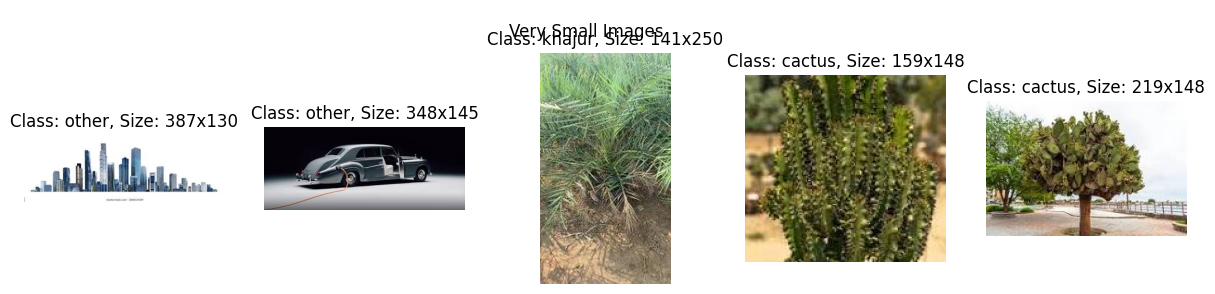

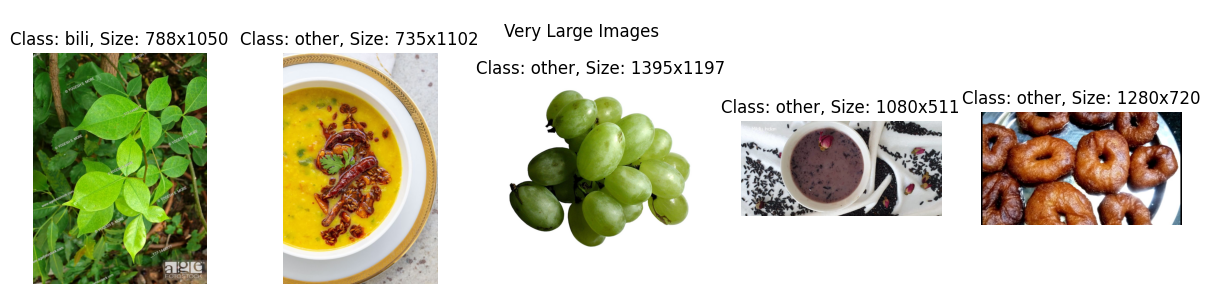

In [52]:
def show_images(df_subset, title, n=5):
  plt.figure(figsize=(15, 3))
  for i, (_, row) in enumerate (df_subset.head(n).iterrows()):
    img = Image.open(row['path'])
    plt.subplot(1, n, i+1)
    plt.imshow(img)
    plt.title(f"\nClass: {row['class']}, Size: {row['width']}x{row['height']}")
    plt.axis('off')
  plt.suptitle(title,)
  plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [53]:
import os

outliers = pd.concat([small_imgs, large_imgs])

removed_count = 0
for path in outliers['path']:
  try:
    os.remove(path)
    removed_count += 1
  except Exception as e:
    print(f"Error deleting {path}: {e}")

print(f"{removed_count} outlier images removed.")

68 outlier images removed.


In [54]:
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1446.000000  1446.000000
mean    273.334716   234.377593
std     112.195461    99.054163
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   197.000000
75%     275.000000   254.750000
max    1000.000000  1000.000000


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1171 images belonging to 31 classes.
Found 275 images belonging to 31 classes.


In [56]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [58]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.0862 - loss: 3.3907 - val_accuracy: 0.0873 - val_loss: 3.3762
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.0838 - loss: 3.3954 - val_accuracy: 0.0873 - val_loss: 3.3726
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.0980 - loss: 3.3651 - val_accuracy: 0.0873 - val_loss: 3.3779
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.0784 - loss: 3.3809 - val_accuracy: 0.0873 - val_loss: 3.3757
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.0717 - loss: 3.3928 - val_accuracy: 0.0873 - val_loss: 3.3725
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.0943 - loss: 3.3831 - val_accuracy: 0.0873 - val_loss: 3.3818
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.0874 - loss: 3.3866 - val_accuracy: 0.0873 - val_loss: 3.3730
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.0842 - loss: 3.3774 - val_accuracy: 0.0873 - v

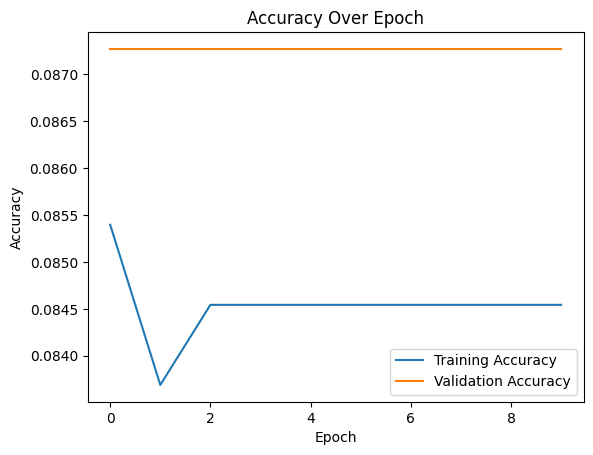

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

model.save("tree_species_model.h5")

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
#Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs = EPOCHS,
    validation_data = val_generator
)

model_cnn.save('basic_cnn_tree_species.h5')
print("Model saved as 'basic_cnn_tree_species'")

Found 1171 images belonging to 31 classes.
Found 275 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 176s 5s/step - accuracy: 0.0603 - loss: 3.7408 - val_accuracy: 0.1055 - val_loss: 3.2649
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.1012 - loss: 3.2803 - val_accuracy: 0.1273 - val_loss: 3.1323
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 166s 5s/step - accuracy: 0.1288 - loss: 3.1070 - val_accuracy: 0.1527 - val_loss: 2.9582
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.1262 - loss: 3.0618 - val_accuracy: 0.1709 - val_loss: 2.8655
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - accuracy: 0.1739 - loss: 2.9586 - val_accuracy: 0.1709 - val_loss: 2.8176
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - accuracy: 0.1998 - loss: 2.8413 - val_accuracy: 0.2400 - val_loss: 2.7003
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 194s 4s/step - accuracy: 0.1767 - loss: 2.8432 - val_accuracy: 0.2436 - val_loss: 2.6869
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.2412 - loss: 2.7002 - val_accuracy: 0.2436 - v

Model saved as 'basic_cnn_tree_species'


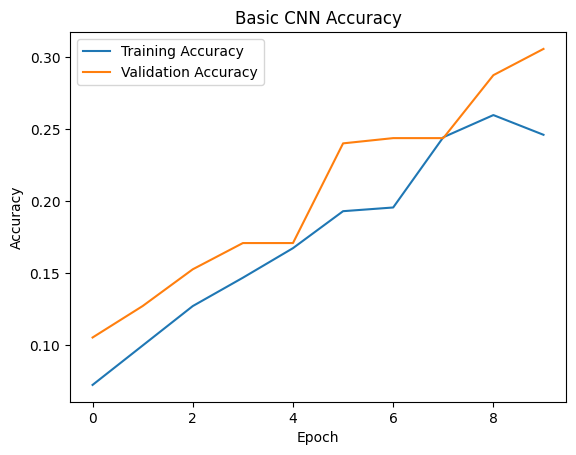

In [61]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Basic CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 237s 6s/step - accuracy: 0.0595 - loss: 5.2209 - val_accuracy: 0.0400 - val_loss: 5.8129
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 231s 6s/step - accuracy: 0.0940 - loss: 3.2957 - val_accuracy: 0.0327 - val_loss: 9.9771
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 232s 6s/step - accuracy: 0.1012 - loss: 3.1722 - val_accuracy: 0.0436 - val_loss: 12.7046
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 230s 6s/step - accuracy: 0.1181 - loss: 3.1664 - val_accuracy: 0.0473 - val_loss: 15.0724
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 231s 6s/step - accuracy: 0.1248 - loss: 3.1854 - val_accuracy: 0.0327 - val_loss: 17.7809
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 230s 6s/step - accuracy: 0.1571 - loss: 3.0432 - val_accuracy: 0.0327 - val_loss: 16.7440
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 230s 6s/step - accuracy: 0.1450 - loss: 3.0204 - val_accuracy: 0.0545 - val_loss: 14.8384
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 263s 6s/step - accuracy: 0.1600 - loss: 3.0452 - val_accuracy: 0.112